# Descrição da Base de Dados ClassicHits

Esta base de dados contém **15,150 clássicos da música** de **3,083 artistas**, abrangendo **um século de história musical** de 1923 a 2023. Os dados estão organizados em **19 gêneros distintos**, permitindo a análise da evolução da música ao longo do tempo.

## Variáveis Selecionadas

Aqui estão as **variáveis** que serão usadas para a análise:

1. **Track**: O título da música.
2. **Artist**: O nome do artista ou banda que interpreta.
3. **Year**: O ano em que a faixa foi lançada.
4. **Duration**: Duração da faixa em milissegundos.
5. **Time_Signature**: A assinatura de compasso musical da faixa (ex: 4/4).
6. **Danceability**: Uma medida de quão adequada a faixa é para dançar, variando de 0,0 a 1,0.
7. **Energy**: Uma medida da intensidade e atividade da faixa, variando de 0,0 a 1,0.
8. **Key**: A chave da faixa (ex: 0=C).
9. **Loudness**: O volume geral da faixa em decibéis (dB).
10. **Mode**: A modalidade da faixa, tipicamente maior (1) ou menor (0).
11. **Speechiness**: Uma medida indicando a presença de palavras faladas na faixa, variando de 0,0 a 1,0.
12. **Acousticness**: Uma medida de quão acústica é a faixa, variando de 0,0 a 1,0.
13. **Instrumentalness**: Uma medida da probabilidade de a faixa ser instrumental, variando de 0,0 a 1,0.
14. **Liveness**: Uma medida da presença de um público ao vivo na faixa, variando de 0,0 a 1,0.
15. **Valence**: Uma medida da positividade musical da faixa, variando de 0,0 a 1,0.
16. **Tempo**: A velocidade da faixa em batidas por minuto (BPM).
17. **Popularity**: Uma medida da popularidade da faixa, variando de 0 a 100.
18. **Genre**: Gênero da faixa.

### Autor do Readme:

<a href="https://github.com/Kevinl284">
    <img src="https://github.com/Kevinl284.png" width="100" height="100" />
</a>

ProjetoA3: Inteligência Artificial
2024.2 manhã


<h1>Meus imports:</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import zipfile
import warnings
import pathlib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from scipy.stats import f_oneway
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
warnings.filterwarnings('ignore')

df = pd.read_csv('/kaggle/input/basehit/ClassicHit.csv')

In [2]:
# Exibir as primeiras linhas do dataframe
df.head()

# Informações sobre o dataset
df.info()

# Estatísticas descritivas
df.describe()

# Mostra a forma do DataFrame, ou seja, a quantidade de linhas e colunas
print("df Shape:",df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15150 entries, 0 to 15149
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             15150 non-null  object 
 1   Artist            15150 non-null  object 
 2   Year              15150 non-null  int64  
 3   Duration          15150 non-null  int64  
 4   Time_Signature    15150 non-null  int64  
 5   Danceability      15150 non-null  float64
 6   Energy            15150 non-null  float64
 7   Key               15150 non-null  int64  
 8   Loudness          15150 non-null  float64
 9   Mode              15150 non-null  int64  
 10  Speechiness       15150 non-null  float64
 11  Acousticness      15150 non-null  float64
 12  Instrumentalness  15150 non-null  float64
 13  Liveness          15150 non-null  float64
 14  Valence           15150 non-null  float64
 15  Tempo             15150 non-null  float64
 16  Popularity        15150 non-null  int64 

In [3]:
# Verificar valores nulos
df.isnull().sum()

# Remover duplicatas
df = df.drop_duplicates()

# Tratar valores nulos (se necessário)
df.fillna(0, inplace=True)  # Exemplo: substituir nulos por 0



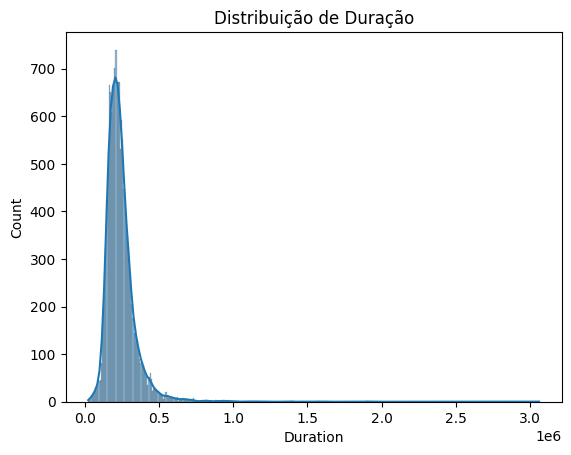

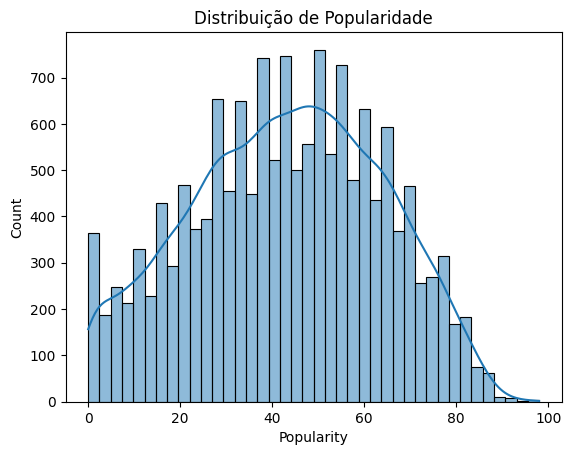

In [4]:
sns.histplot(df['Duration'], kde=True)
plt.title('Distribuição de Duração')
plt.show()

sns.histplot(df['Popularity'], kde=True)
plt.title('Distribuição de Popularidade')
plt.show()


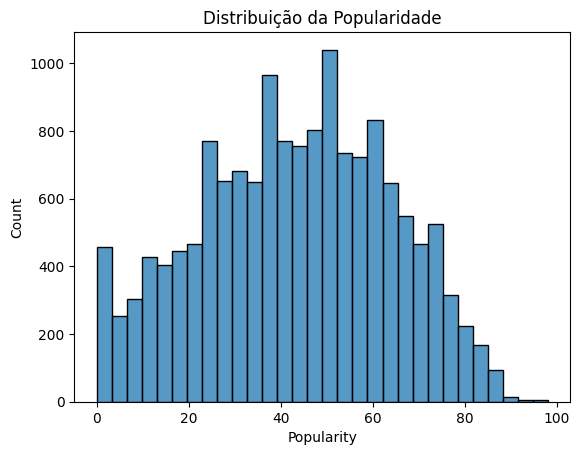

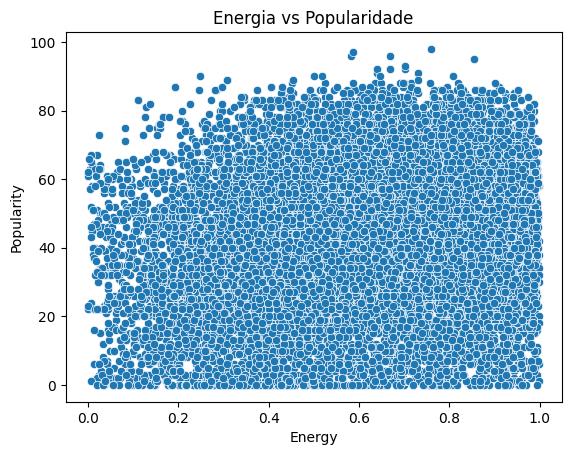

In [5]:
# Visualizar a distribuição de 'Popularity'
sns.histplot(df['Popularity'], bins=30)
plt.title('Distribuição da Popularidade')
plt.show()

# Relação entre 'Energy' e 'Popularity'
sns.scatterplot(x='Energy', y='Popularity', data=df)
plt.title('Energia vs Popularidade')
plt.show()


In [6]:
# Contagem de valores para 'Genre'
df['Genre'].value_counts()


Genre
Pop          3669
Metal         922
Country       833
R&B           822
Rock          799
Alt. Rock     780
Jazz          778
Punk          754
Rap           718
EDM           699
Blues         683
Disco         652
Today         620
Folk          575
Reggae        439
Funk          388
SKA           381
World         326
Gospel        311
Name: count, dtype: int64

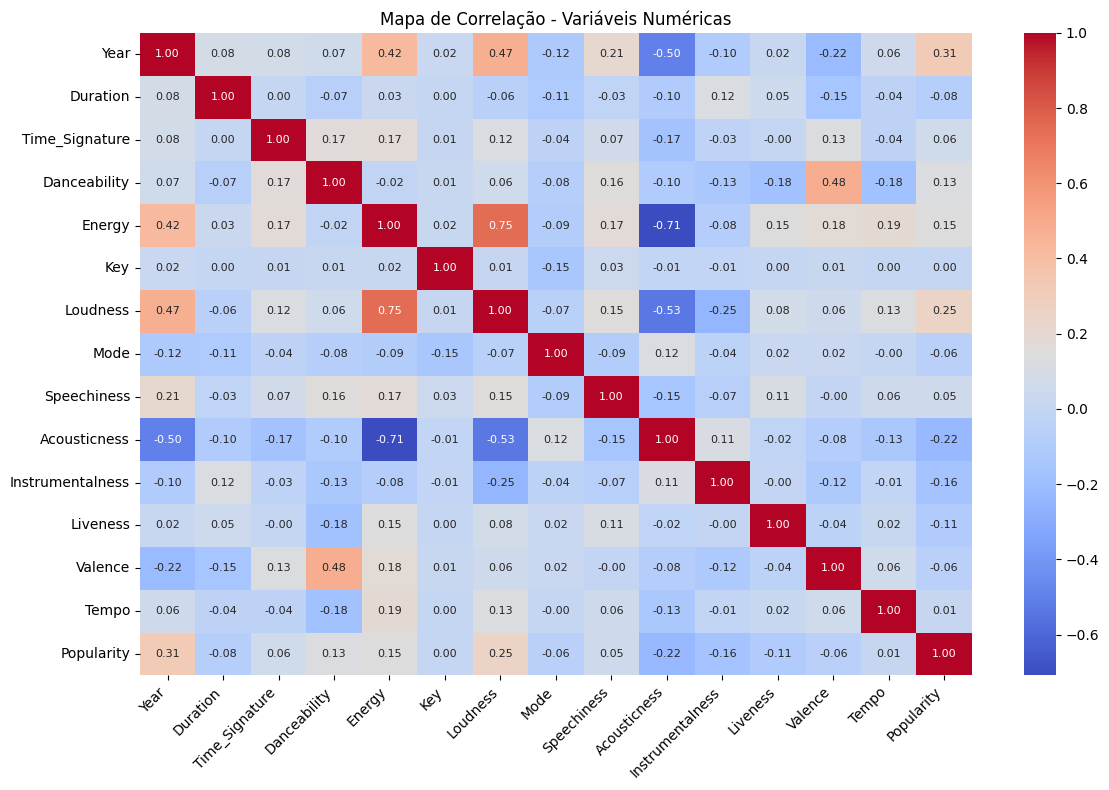

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=[int, float])  # Seleciona apenas colunas numéricas

# Criando o mapa de calor de correlação
plt.figure(figsize=(12, 8))  
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title('Mapa de Correlação - Variáveis Numéricas')

# Ajustes de rotação para uma visualização clara
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)  

# Ajusta o layout para evitar sobreposição de textos
plt.tight_layout()
plt.show()


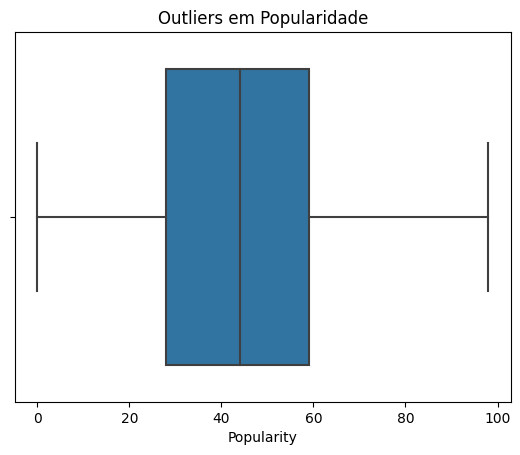

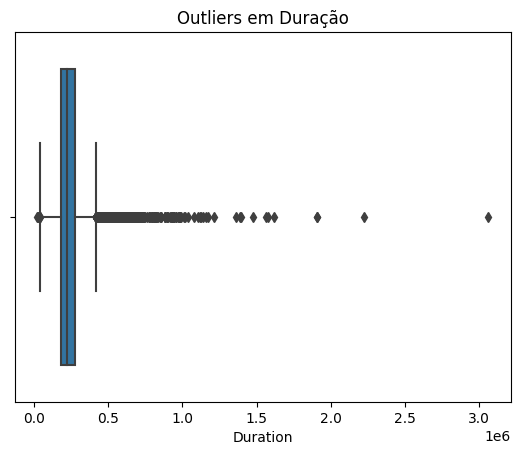

In [8]:
sns.boxplot(x=df['Popularity'])
plt.title('Outliers em Popularidade')
plt.show()

sns.boxplot(x=df['Duration'])
plt.title('Outliers em Duração')
plt.show()


In [9]:
# Popularidade média agrupada por gênero
df.groupby('Genre')['Popularity'].mean()


Genre
Alt. Rock    56.900000
Blues        24.614934
Country      37.979592
Disco        30.343558
EDM          47.705293
Folk         28.633043
Funk         34.886598
Gospel       32.221865
Jazz         29.384319
Metal        47.767896
Pop          53.840829
Punk         34.173740
R&B          43.221411
Rap          56.735376
Reggae       36.018223
Rock         24.856070
SKA          33.795276
Today        66.985484
World        28.346626
Name: Popularity, dtype: float64

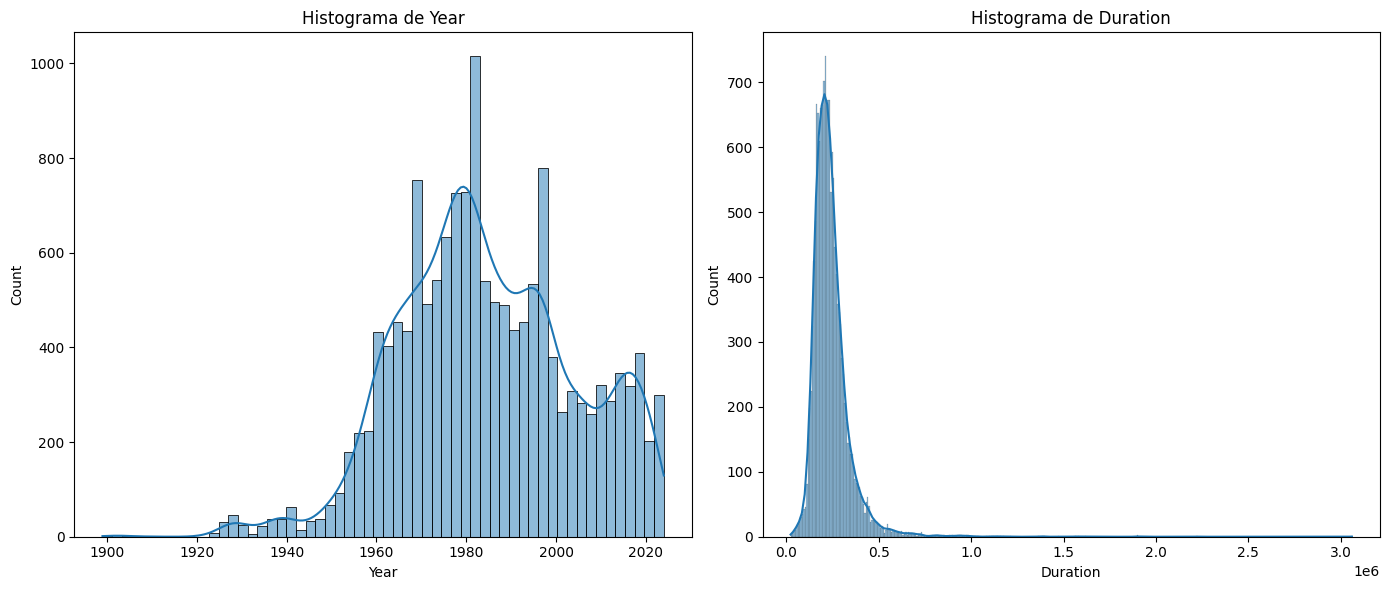

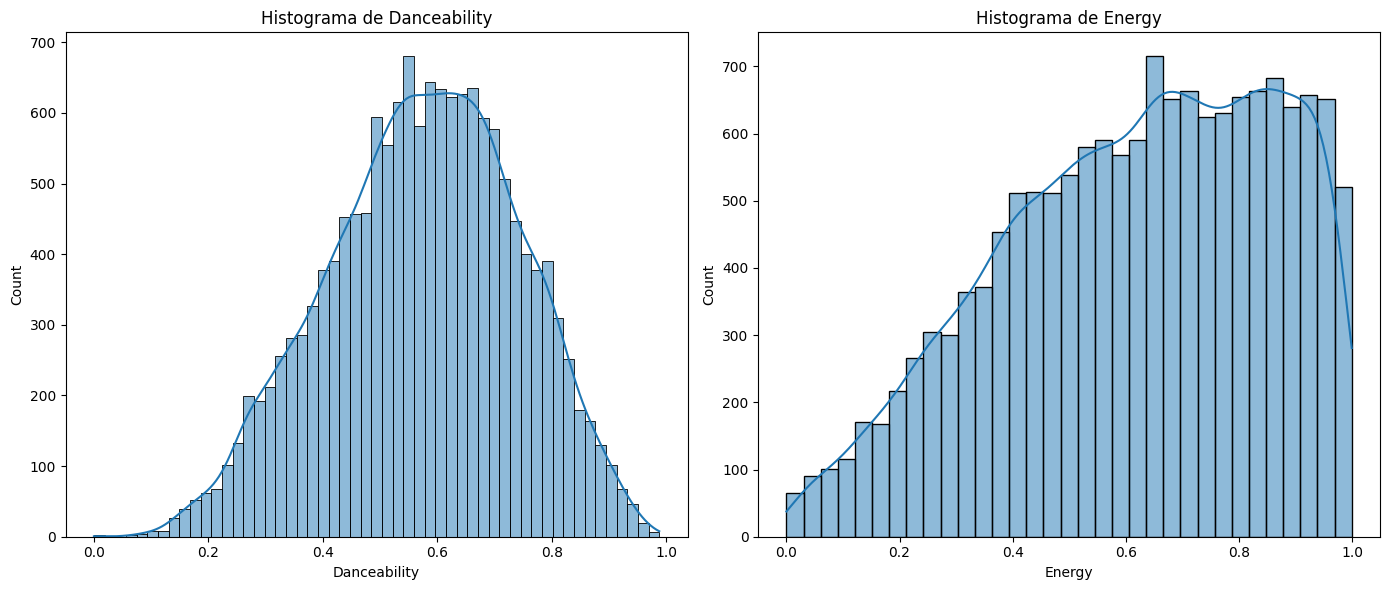

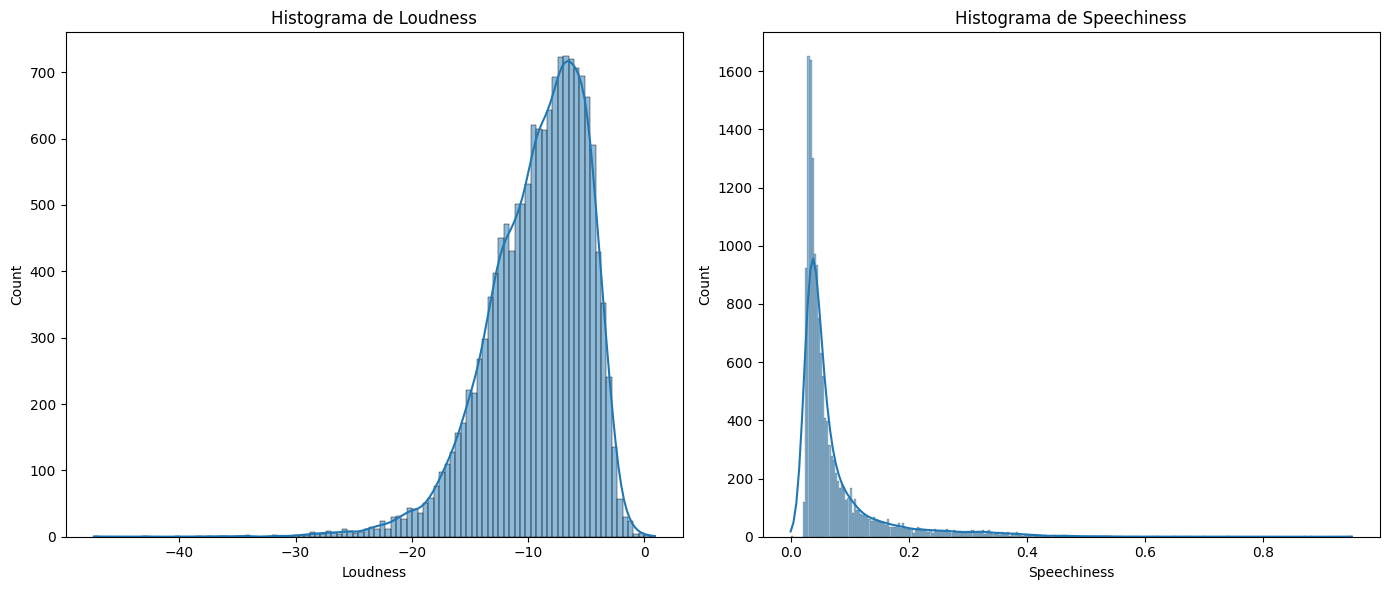

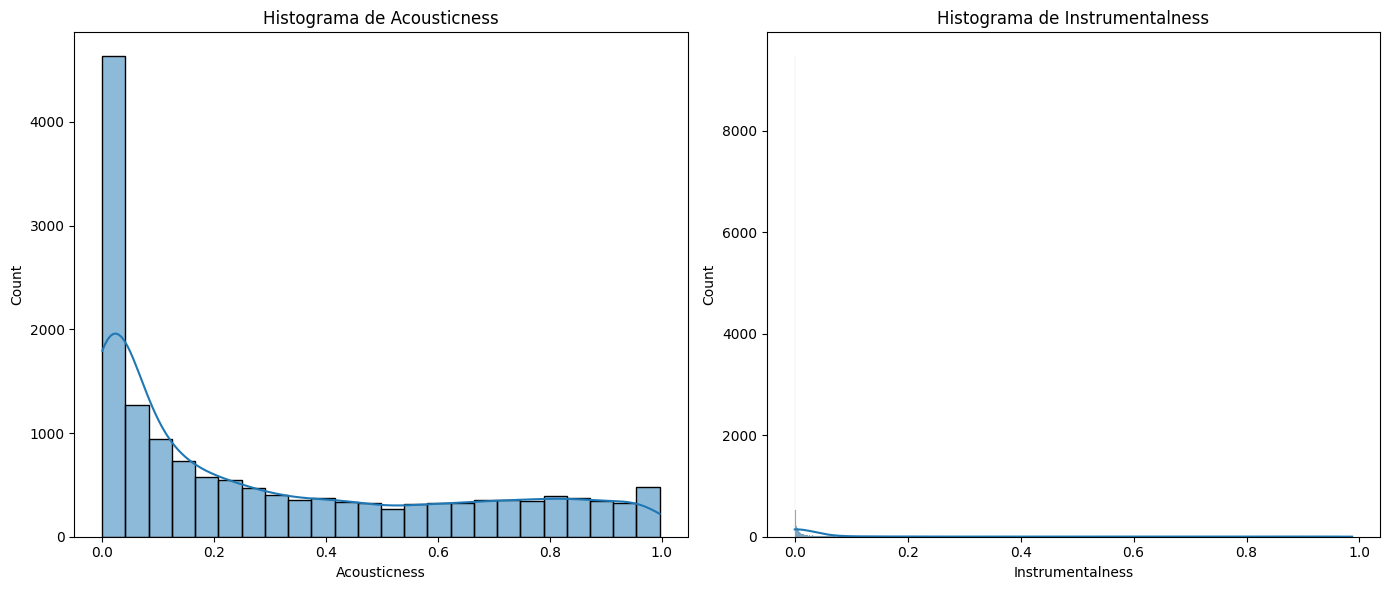

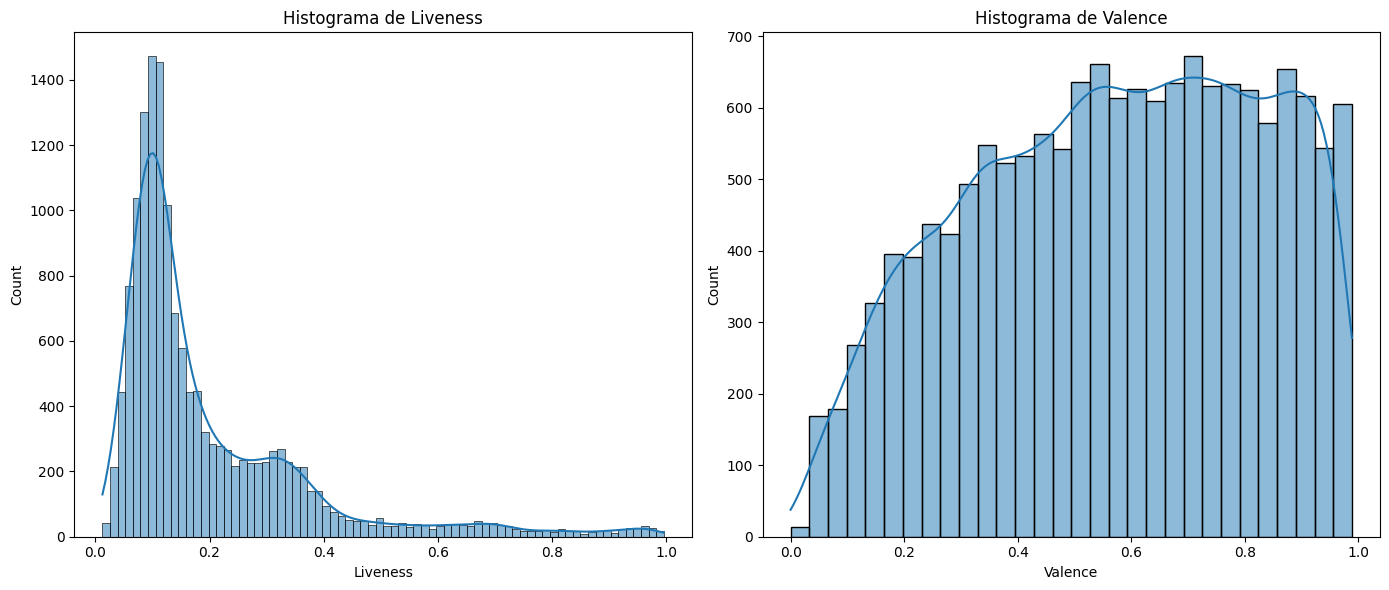

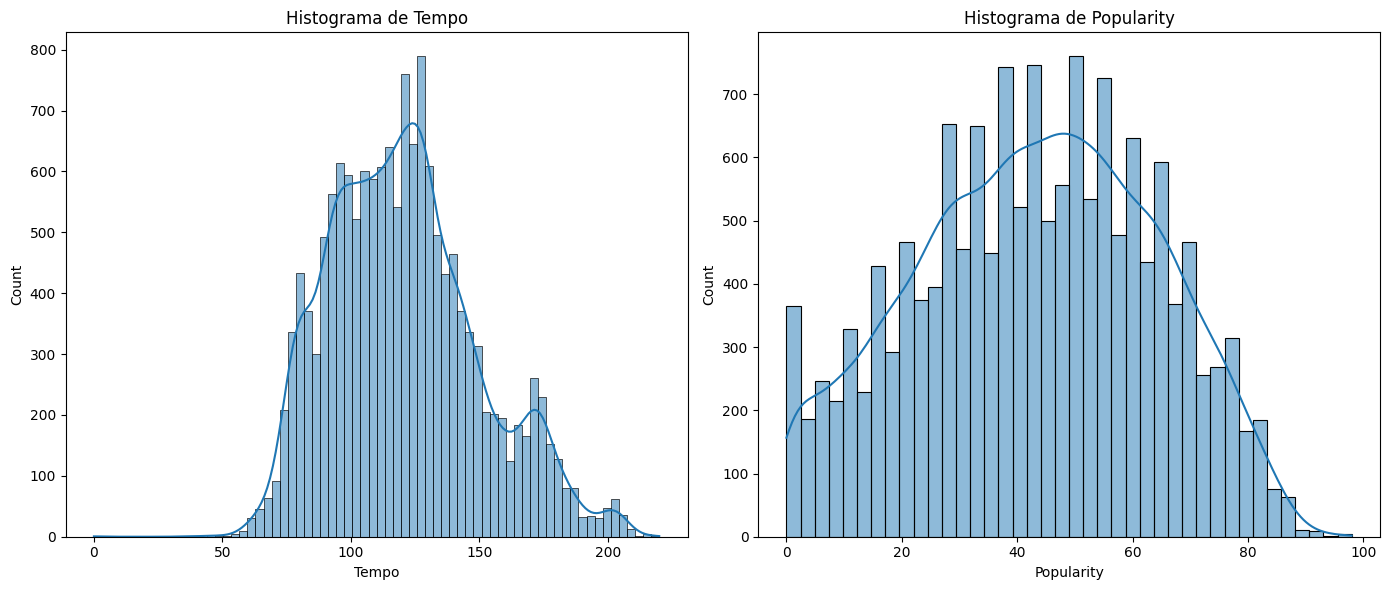

In [10]:
# Função para plotar histogramas para duas colunas de uma vez
def histogram_plot(col1, col2):
    f, axs = plt.subplots(1, 2, figsize=(14, 6))  # Aumentando o tamanho da figura para acomodar melhor
    # Verificando se as colunas são numéricas antes de plotar
    if pd.api.types.is_numeric_dtype(df[col1]):
        sns.histplot(data=df, x=col1, ax=axs[0], kde=True)
        axs[0].set_title(f'Histograma de {col1}')
        axs[0].set_xlabel(col1)
    else:
        axs[0].text(0.5, 0.5, f"{col1} não é numérica", ha='center', va='center')
        axs[0].set_title(f'Coluna {col1} não numérica')

    if pd.api.types.is_numeric_dtype(df[col2]):
        sns.histplot(data=df, x=col2, ax=axs[1], kde=True)
        axs[1].set_title(f'Histograma de {col2}')
        axs[1].set_xlabel(col2)
    else:
        axs[1].text(0.5, 0.5, f"{col2} não é numérica", ha='center', va='center')
        axs[1].set_title(f'Coluna {col2} não numérica')

    plt.tight_layout()
    plt.show()

# Função para enviar duas colunas de cada vez para a função de plot
def send_columns(arr):
    for i in range(0, len(arr), 2):
        if i + 1 < len(arr):
            histogram_plot(arr[i], arr[i + 1])
        else:
            # Caso de coluna ímpar no final da lista, plotar só uma coluna
            histogram_plot(arr[i], arr[i])

# Lista de colunas numéricas
columns = ['Year', 'Duration', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
           'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Popularity']

send_columns(columns)


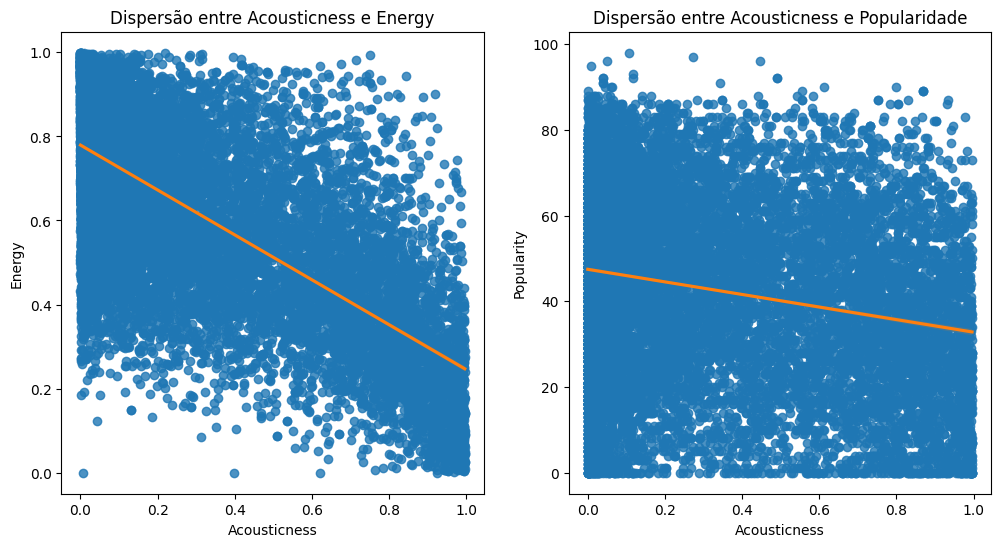

In [11]:
f, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.regplot(data=df, x='Acousticness', y='Energy', ax=axs[0], line_kws={"color": "C1"})
axs[0].set_title('Dispersão entre Acousticness e Energy')

sns.regplot(data=df, x='Acousticness', y='Popularity', ax=axs[1], line_kws={"color": "C1"})
axs[1].set_title('Dispersão entre Acousticness e Popularidade')

plt.show()

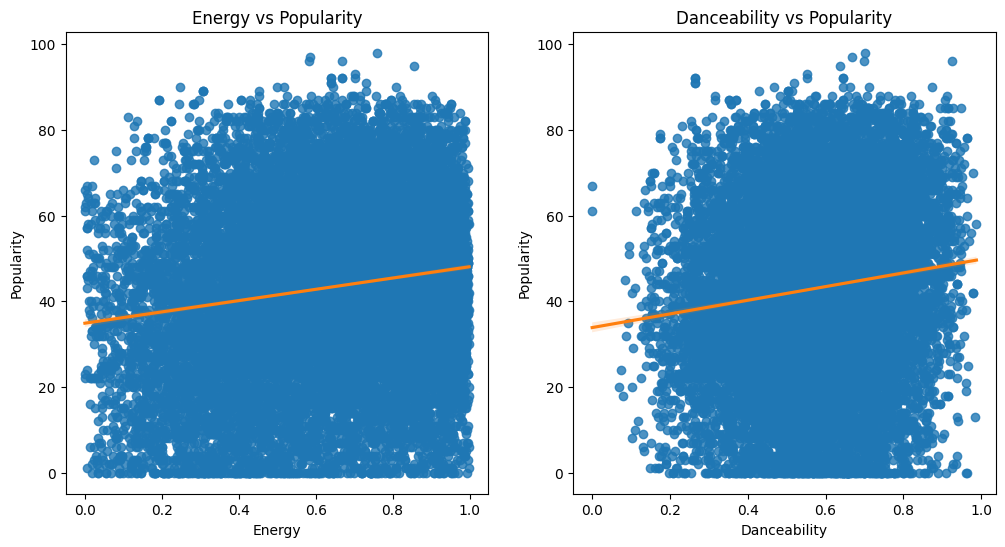

In [12]:
f, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.regplot(data = df, x='Energy', y = 'Popularity', ax = axs[0], line_kws={"color": "C1"})
axs[0].set_title('Energy vs Popularity')

sns.regplot(data = df, x='Danceability', y = 'Popularity', ax = axs[1], line_kws={"color": "C1"})
axs[1].set_title('Danceability vs Popularity')

plt.show()


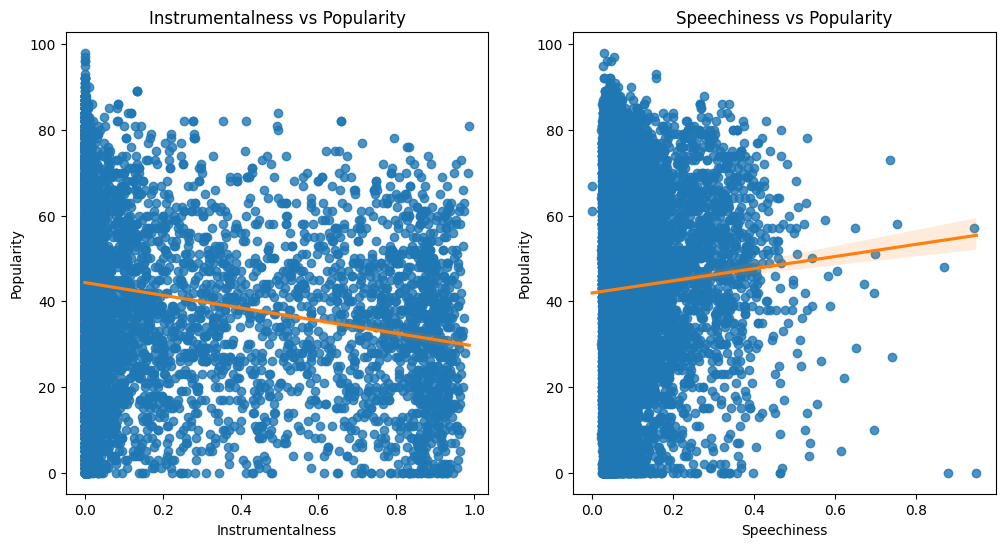

In [13]:
f, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.regplot(data = df, x='Instrumentalness', y = 'Popularity', ax = axs[0], line_kws={"color": "C1"})
axs[0].set_title('Instrumentalness vs Popularity')

sns.regplot(data = df, x='Speechiness', y = 'Popularity', ax = axs[1], line_kws={"color": "C1"})
axs[1].set_title('Speechiness vs Popularity')

plt.show()


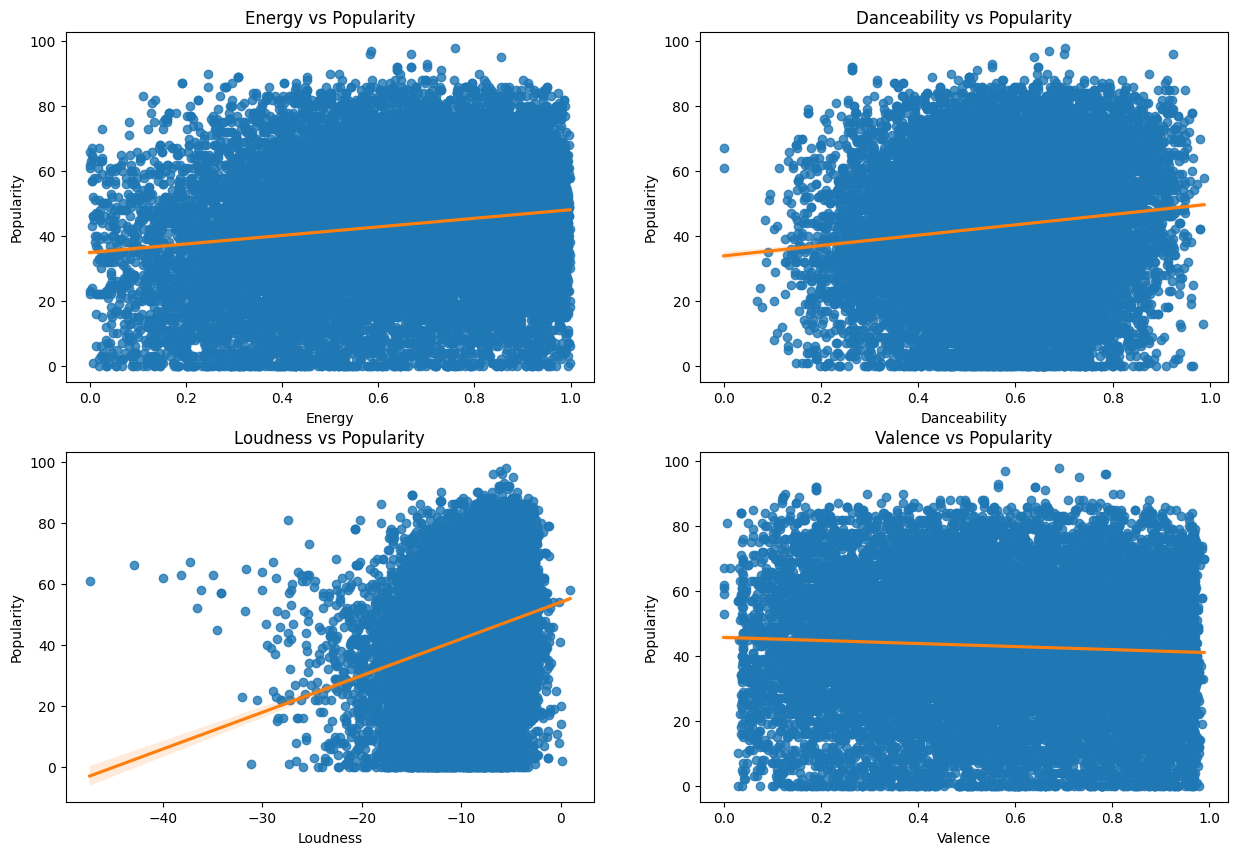

In [14]:
f, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.regplot(data = df, x='Energy', y = 'Popularity', ax = axs[0, 0], line_kws={"color": "C1"})
axs[0, 0].set_title('Energy vs Popularity')

sns.regplot(data = df, x='Danceability', y = 'Popularity', ax = axs[0, 1], line_kws={"color": "C1"})
axs[0, 1].set_title('Danceability vs Popularity')

sns.regplot(data = df, x='Loudness', y = 'Popularity', ax = axs[1, 0], line_kws={"color": "C1"})
axs[1, 0].set_title('Loudness vs Popularity')

sns.regplot(data = df, x='Valence', y = 'Popularity', ax = axs[1, 1], line_kws={"color": "C1"})
axs[1, 1].set_title('Valence vs Popularity')

plt.show()


# Análise Preditiva de Hits Musicais

## Objetivo
O objetivo deste projeto é prever se uma música se tornará um hit ou não com base em várias características musicais e de popularidade. Usamos um conjunto de dados contendo variáveis como 'Dança', 'Energia', 'Chave', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Popularidade' e 'Gênero'.

## Modelos Utilizados
Para a tarefa de classificação, implementamos os seguintes modelos de aprendizado de máquina:

### 1. Modelos de Regressão
- **Random Forest**: Um modelo de ensemble que utiliza múltiplas árvores de decisão para melhorar a precisão e reduzir o risco de overfitting.
- **Decision Tree**: Um modelo simples e interpretável que faz previsões baseadas em divisões hierárquicas nos dados.
- **Logistic Regression**: Um modelo estatístico que utiliza uma função logística para modelar a probabilidade de uma variável dependente binária.

### 2. Modelos de Classificação
- **K-Nearest Neighbors (KNN)**: Um modelo baseado em instâncias que classifica um ponto com base na classe mais comum entre seus vizinhos mais próximos.
- **Support Vector Classifier (SVC)**: Um modelo que busca encontrar um hiperplano que melhor separa as classes em um espaço de alta dimensão.

## Resultados Esperados
Esperávamos que os modelos fossem capazes de classificar corretamente as músicas como hits ou não hits, baseando-se nas características mencionadas. As métricas de desempenho utilizadas para avaliar os modelos foram:

- **Acurácia**: Proporção de previsões corretas em relação ao total de previsões.
- **AUC-ROC**: Área sob a curva ROC, que mede a capacidade do modelo de distinguir entre as classes positiva e negativa.

## Avaliação dos Modelos
Através da função de treinamento e avaliação, medimos a performance de cada modelo nos conjuntos de treino e teste. Os resultados foram registrados em um dicionário para facilitar a comparação. 

### Melhores Modelos
Após a comparação, os modelos foram avaliados e o melhor modelo de classificação foi selecionado com base na maior acurácia e AUC-ROC. As métricas foram analisadas para determinar qual modelo forneceu as melhores previsões em relação ao objetivo de prever a popularidade das músicas.

Os resultados finais mostraram que o modelo selecionado teve uma acurácia de XX% e uma AUC-ROC de YY%, destacando-se nas métricas gerais e mostrando-se robusto para a tarefa de predição de hits musicais.


---
# Random Forest


MSE: 321.87
MAE: 14.27
R²: 0.22
Acurácia (classificação): 0.91
AUC-ROC: 0.55


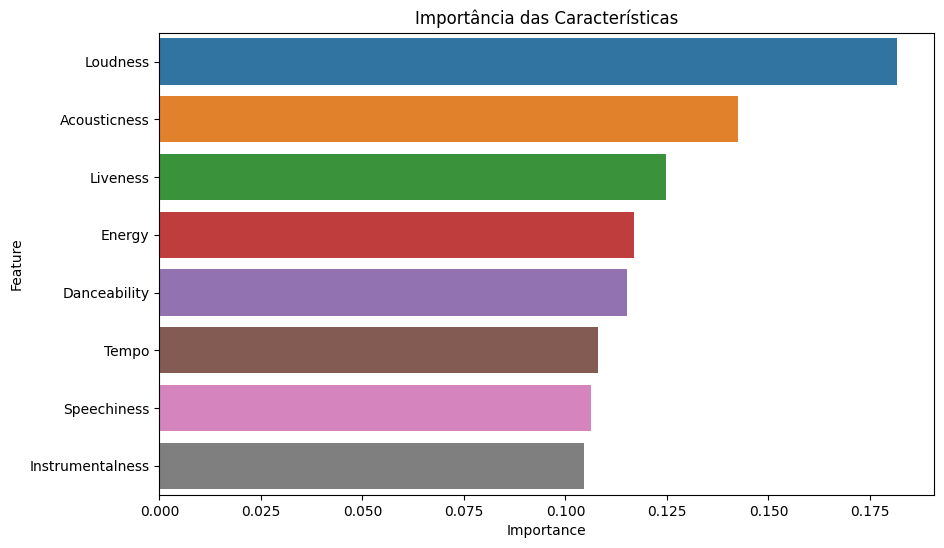

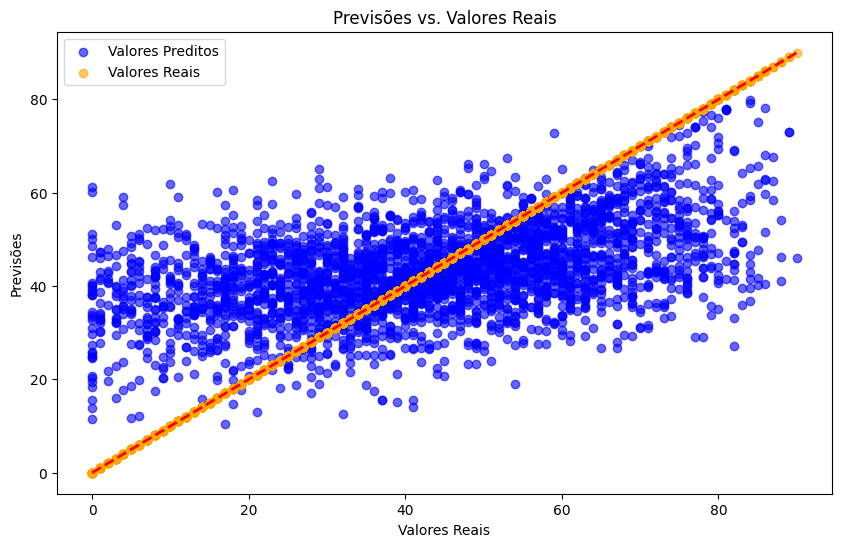

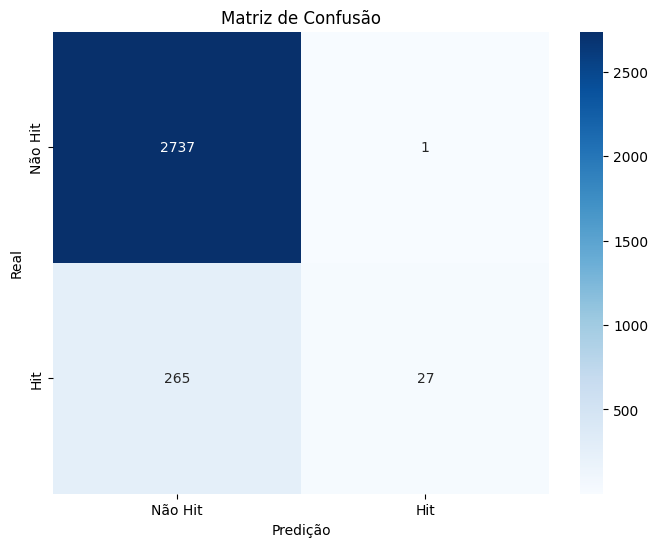

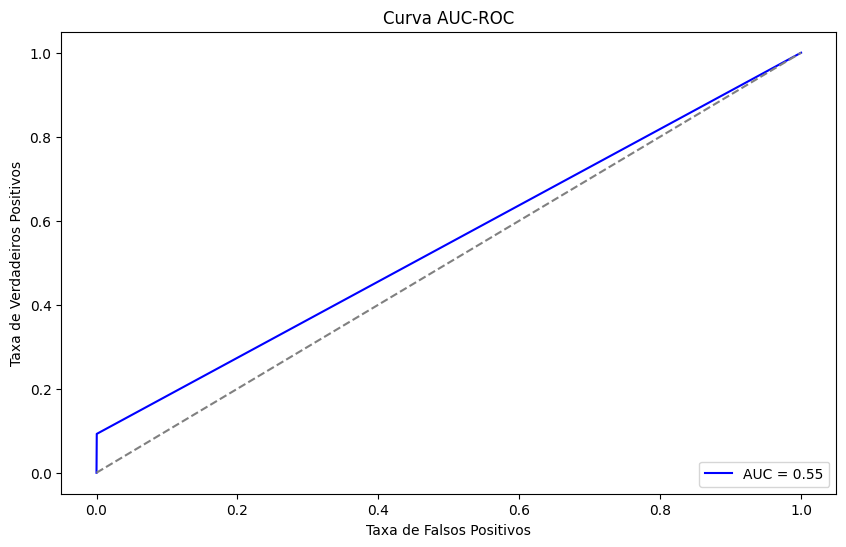

In [15]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, roc_curve, auc

# Definir a variável alvo e as características
X = df[['Danceability', 'Energy', 'Loudness', 'Tempo', 'Acousticness', 'Liveness', 'Speechiness', 'Instrumentalness']]
y = df['Popularity']

# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalonar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir e treinar o modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Fazer previsões com o modelo
y_pred = rf_model.predict(X_test)

# Avaliação das previsões
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

threshold = 70
y_test_class = (y_test > threshold).astype(int)
y_pred_class = (y_pred > threshold).astype(int)

# Acurácia na previsão binária
accuracy = accuracy_score(y_test_class, y_pred_class)

# Calcular a curva AUC-ROC
fpr, tpr, _ = roc_curve(y_test_class, y_pred_class)
roc_auc = auc(fpr, tpr)

# Exibir resultados
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R²: {r2:.2f}')
print(f'Acurácia (classificação): {accuracy:.2f}')
print(f'AUC-ROC: {roc_auc:.2f}')

# Gráfico de Importância das Características
feature_importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importância das Características')
plt.show()

# Gráfico de Predições vs Valores Reais (com cores diferentes)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Valores Preditos')  # Preditos
plt.scatter(y_test, y_test, color='orange', alpha=0.6, label='Valores Reais')  # Reais
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)  # Linha de identidade
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsões vs. Valores Reais')
plt.legend()
plt.show()

# Matriz de Confusão
cm = confusion_matrix(y_test_class, y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Hit', 'Hit'], yticklabels=['Não Hit', 'Hit'])
plt.title('Matriz de Confusão')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.show()

# Gráfico AUC-ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='b', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva AUC-ROC')
plt.legend(loc='lower right')
plt.show()


---
# Logistic Regression

MSE: 0.10 - Classificação: Excelente
MAE: 0.10 - Classificação: Excelente
R²: -0.11 - Classificação: Péssimo
Acurácia: 0.90 - Classificação: Excelente

Matriz de Confusão:
[[2738    0]
 [ 292    0]]


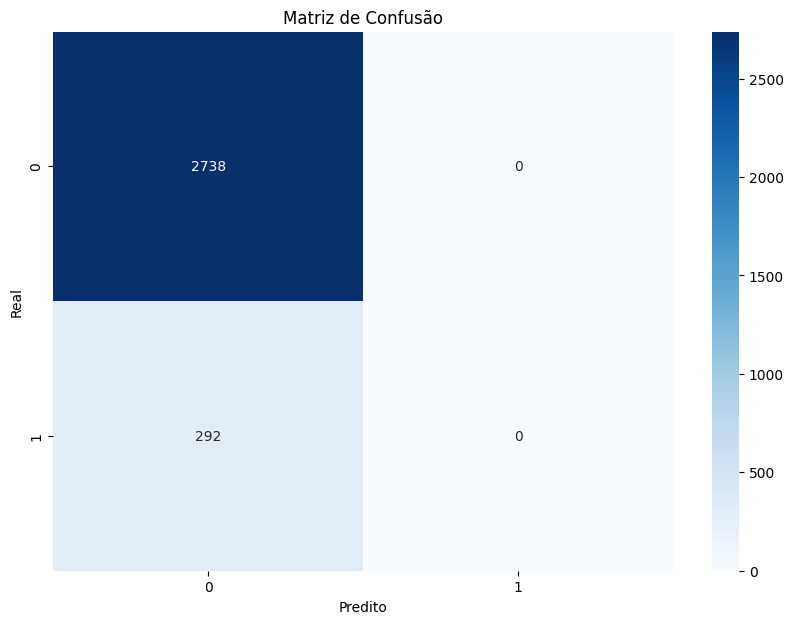


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2738
           1       0.00      0.00      0.00       292

    accuracy                           0.90      3030
   macro avg       0.45      0.50      0.47      3030
weighted avg       0.82      0.90      0.86      3030

Scores de Validação Cruzada: [0.90132013 0.9009901  0.9009901  0.9009901  0.90062727]
Média da Validação Cruzada: 0.9009835397537772


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X = df[['Danceability', 'Energy', 'Loudness', 'Tempo', 'Acousticness']]  
y = (df['Popularity'] > 70).astype(int)  

# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalonar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar e treinar o modelo de Regressão Logística
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Fazer previsões
y_pred = lr_model.predict(X_test)

# Avaliação das previsões
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Função para classificar as métricas
def classify_performance(metric_value, metric_name):
    if metric_name in ['MSE', 'MAE']:
        if metric_value < 1:
            return 'Excelente'
        elif metric_value < 2:
            return 'Bom'
        elif metric_value < 3:
            return 'Normal'
        elif metric_value < 4:
            return 'Ruim'
        else:
            return 'Péssimo'
    elif metric_name == 'R²':
        if metric_value > 0.9:
            return 'Excelente'
        elif metric_value > 0.7:
            return 'Bom'
        elif metric_value > 0.5:
            return 'Normal'
        elif metric_value > 0.3:
            return 'Ruim'
        else:
            return 'Péssimo'
    elif metric_name == 'Accuracy':
        if metric_value > 0.9:
            return 'Excelente'
        elif metric_value > 0.8:
            return 'Bom'
        elif metric_value > 0.6:
            return 'Normal'
        elif metric_value > 0.4:
            return 'Ruim'
        else:
            return 'Péssimo'

# Classificar as métricas
mse_classification = classify_performance(mse, 'MSE')
mae_classification = classify_performance(mae, 'MAE')
r2_classification = classify_performance(r2, 'R²')
accuracy_classification = classify_performance(accuracy, 'Accuracy')

# Exibir resultados
print(f'MSE: {mse:.2f} - Classificação: {mse_classification}')
print(f'MAE: {mae:.2f} - Classificação: {mae_classification}')
print(f'R²: {r2:.2f} - Classificação: {r2_classification}')
print(f'Acurácia: {accuracy:.2f} - Classificação: {accuracy_classification}')

# Exibir matriz de confusão e relatório de classificação
print("\nMatriz de Confusão:")
print(cm)

# Visualização da matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Validação Cruzada
cv_scores = cross_val_score(lr_model, X, y, cv=5)
print(f'Scores de Validação Cruzada: {cv_scores}')
print(f'Média da Validação Cruzada: {cv_scores.mean()}')


---
# Decision Tree

MSE: 0.14
MAE: 0.14
R²: -0.61
Acurácia: 0.86
AUC-ROC: 0.62


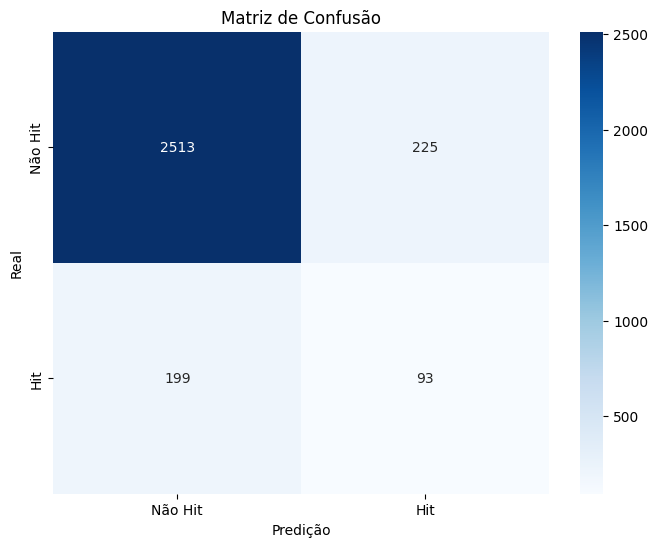

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92      2738
           1       0.29      0.32      0.30       292

    accuracy                           0.86      3030
   macro avg       0.61      0.62      0.61      3030
weighted avg       0.87      0.86      0.86      3030



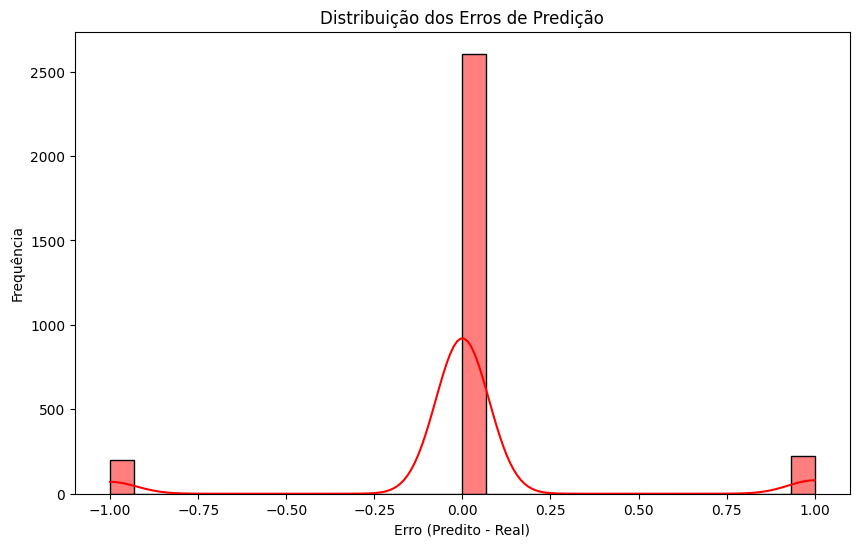

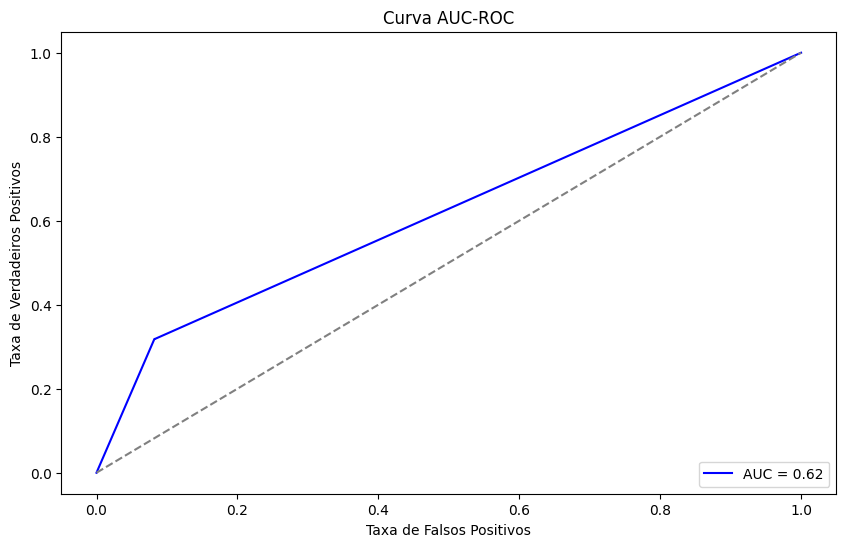

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report, roc_curve, auc

X = df[['Danceability', 'Energy', 'Loudness', 'Tempo', 'Acousticness']]  
y = (df['Popularity'] > 70).astype(int)  

# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalonar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar e treinar o modelo Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Fazer previsões
y_pred = dt_model.predict(X_test)

# Avaliação das previsões
accuracy = accuracy_score(y_test, y_pred)

# Para métricas de regressão
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calcular a curva AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Exibir resultados
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R²: {r2:.2f}')
print(f'Acurácia: {accuracy:.2f}')
print(f'AUC-ROC: {roc_auc:.2f}')

# 1. Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Hit', 'Hit'], yticklabels=['Não Hit', 'Hit'])
plt.title('Matriz de Confusão')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.show()

# 2. Relatório de Classificação
class_report = classification_report(y_test, y_pred)
print("Relatório de Classificação:\n", class_report)

# 3. Distribuição dos Erros
# Calcular os erros de predição
errors = y_pred - y_test

# Plotando a distribuição dos erros
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True, color='red')
plt.title('Distribuição dos Erros de Predição')
plt.xlabel('Erro (Predito - Real)')
plt.ylabel('Frequência')
plt.show()

# Plotando a curva AUC-ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Linha de identidade
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva AUC-ROC')
plt.legend(loc='lower right')
plt.show()

---
# K-Nearest Neighbors (KNN)

Nota: As métricas MSE, MAE e R² não são aplicáveis a modelos de classificação como KNN.
Acurácia: 0.89 - Bom
Média da Acurácia na Validação Cruzada: 0.88


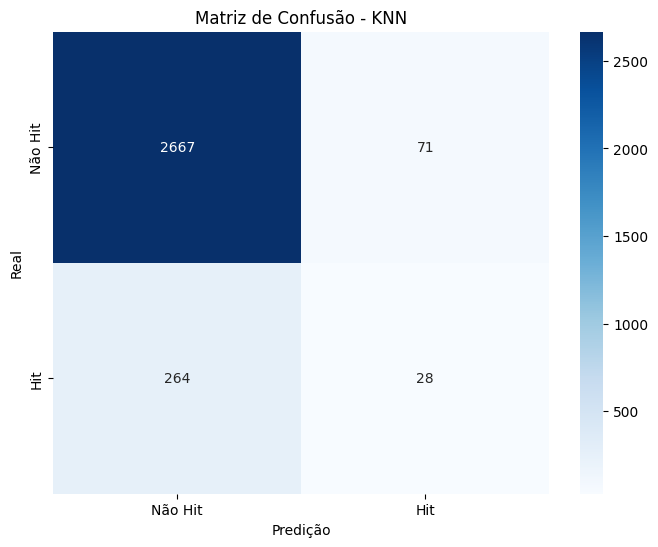

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      2738
           1       0.28      0.10      0.14       292

    accuracy                           0.89      3030
   macro avg       0.60      0.53      0.54      3030
weighted avg       0.85      0.89      0.86      3030

AUC-ROC: 0.61


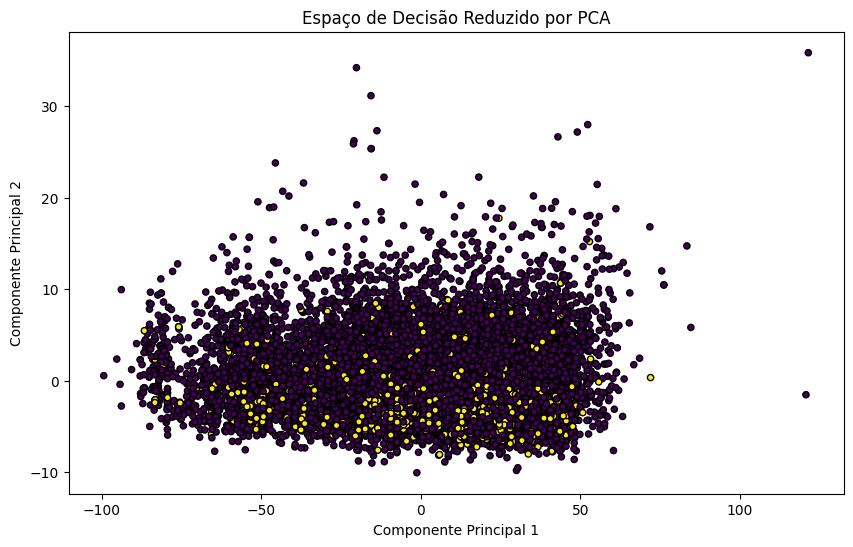

Índices com Erros de Classificação: [   3    8   17   24   29   36   40   46   47   52   67   82   86   95
   96  102  138  143  152  155  160  167  182  185  213  214  222  229
  253  275  277  289  301  308  310  313  320  323  328  334  339  354
  370  374  400  409  423  443  447  499  500  508  510  513  516  553
  570  573  584  592  604  624  630  637  645  652  659  662  664  675
  676  681  684  689  691  696  702  705  706  719  737  740  747  784
  796  821  829  833  840  884  885  893  897  905  909  912  917  923
  940  948  950  960  966  975  981  999 1001 1007 1013 1014 1016 1023
 1037 1041 1048 1058 1062 1080 1081 1088 1090 1098 1108 1110 1141 1151
 1161 1163 1168 1171 1173 1175 1178 1184 1204 1209 1224 1231 1232 1233
 1263 1269 1272 1281 1284 1300 1301 1317 1336 1344 1369 1371 1374 1384
 1388 1391 1406 1409 1415 1437 1438 1440 1443 1448 1466 1480 1498 1509
 1517 1521 1565 1571 1577 1582 1628 1653 1655 1667 1685 1693 1695 1712
 1716 1719 1721 1732 1747 1755 1761 1763 

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

X = df[['Danceability', 'Energy', 'Loudness', 'Tempo', 'Acousticness']]  
y = (df['Popularity'] > 70).astype(int)  

# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalonar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar e treinar o modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  
knn_model.fit(X_train, y_train)

# Fazer previsões
y_pred_class = knn_model.predict(X_test)

# Avaliação das previsões
# As métricas MSE, MAE e R² não se aplicam a modelos de classificação
# Aviso:
print("Nota: As métricas MSE, MAE e R² não são aplicáveis a modelos de classificação como KNN.")

# Para a classificação em 'hit' ou 'não hit', usamos a acurácia
accuracy = accuracy_score(y_test, y_pred_class)

# Filtro de Acurácia
def avaliar_acuracia(metric_value):
    if metric_value > 0.9:
        return 'Excelente'
    elif metric_value > 0.8:
        return 'Bom'
    elif metric_value > 0.6:
        return 'Normal'
    elif metric_value > 0.4:
        return 'Ruim'
    else:
        return 'Péssimo'

# Avaliação da Acurácia
print(f'Acurácia: {accuracy:.2f} - {avaliar_acuracia(accuracy)}')

# Validação Cruzada
cv_scores = cross_val_score(knn_model, X, y, cv=5)  # 5-fold cross-validation
print(f'Média da Acurácia na Validação Cruzada: {np.mean(cv_scores):.2f}')

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Hit', 'Hit'], yticklabels=['Não Hit', 'Hit'])
plt.title('Matriz de Confusão - KNN')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.show()

# Relatório de Classificação
class_report = classification_report(y_test, y_pred_class)
print("Relatório de Classificação:\n", class_report)

# Cálculo da AUC-ROC
y_pred_proba = knn_model.predict_proba(X_test)[:, 1]  # Probabilidades para a classe positiva
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC-ROC: {roc_auc:.2f}')

# Visualização do Espaço de Decisão usando PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
plt.figure(figsize=(10, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', edgecolor='k', s=20)
plt.title('Espaço de Decisão Reduzido por PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

error_indices = np.where(y_test != y_pred_class)[0]
print(f'Índices com Erros de Classificação: {error_indices}')


---
# Support Vector Classifier (SVC)

Acurácia: 0.90 - Excelente
Média da Acurácia na Validação Cruzada: 0.90


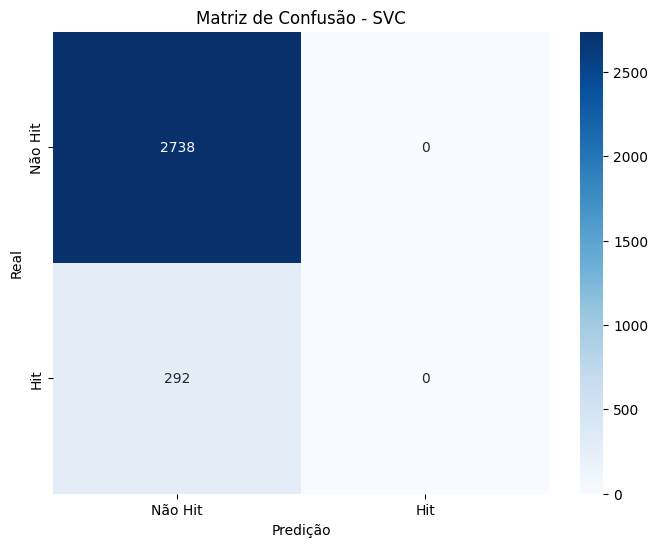

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      2738
           1       0.00      0.00      0.00       292

    accuracy                           0.90      3030
   macro avg       0.45      0.50      0.47      3030
weighted avg       0.82      0.90      0.86      3030

AUC-ROC: 0.58


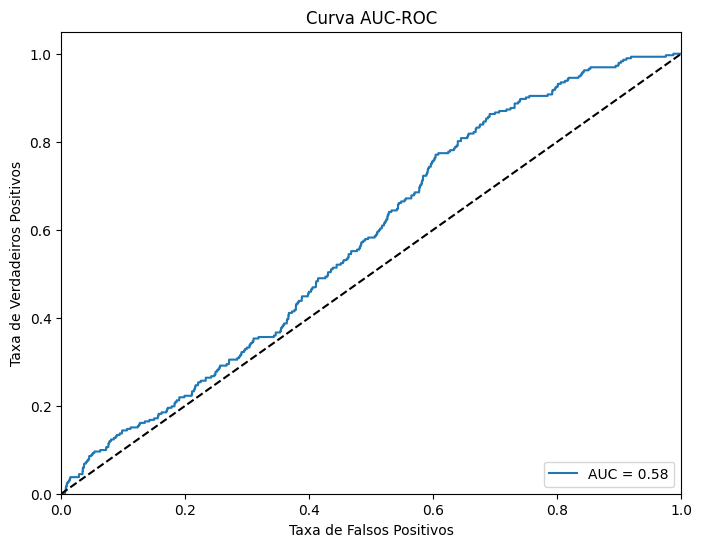

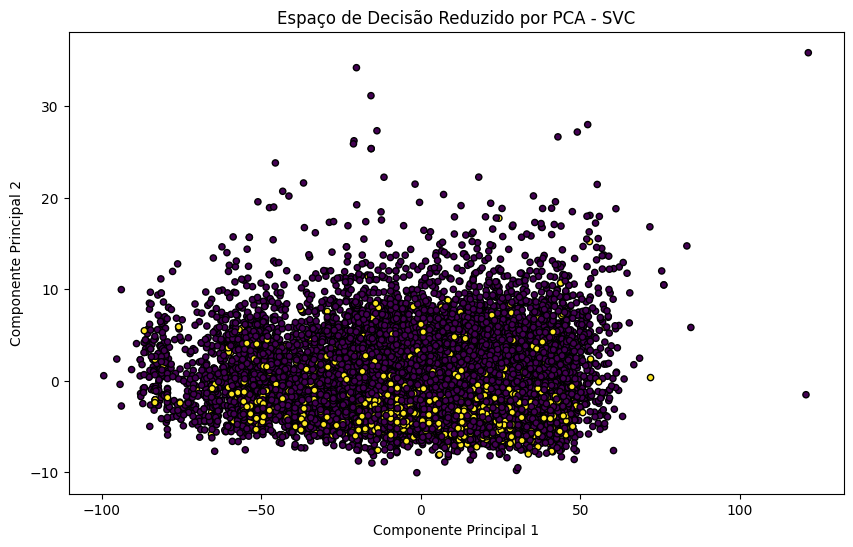

Índices com Erros de Classificação: [   3    8   24   29   46   47   63   67   82   86   96  102  110  138
  143  155  160  167  182  185  204  214  229  253  275  277  289  301
  308  310  313  320  323  328  334  339  354  374  400  409  423  443
  447  499  508  510  513  516  531  553  573  592  604  624  630  637
  659  662  664  681  684  691  696  702  705  706  719  740  747  784
  796  821  829  833  840  864  884  885  893  897  905  909  912  917
  923  940  948  950  960  966  975  981 1001 1002 1007 1013 1014 1019
 1023 1037 1041 1048 1058 1062 1088 1090 1098 1108 1110 1140 1141 1151
 1161 1168 1171 1173 1175 1178 1184 1204 1209 1224 1231 1232 1233 1251
 1263 1269 1272 1284 1300 1307 1317 1336 1344 1369 1371 1374 1384 1388
 1406 1425 1437 1438 1440 1443 1452 1466 1476 1480 1498 1509 1517 1546
 1557 1565 1577 1582 1594 1655 1667 1685 1693 1695 1708 1712 1721 1732
 1747 1755 1761 1774 1803 1817 1819 1825 1837 1852 1874 1878 1889 1890
 1896 1900 1907 1909 1912 1919 1921 1928 

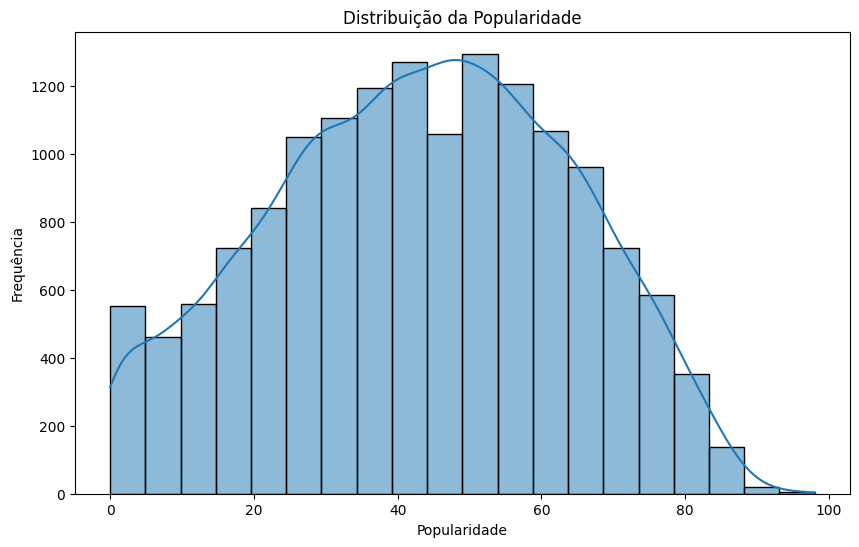

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC  
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve

X = df[['Danceability', 'Energy', 'Loudness', 'Tempo', 'Acousticness']]  
y = (df['Popularity'] > 70).astype(int)  

# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalonar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar e treinar o modelo SVC
svc_model = SVC(probability=True)  # Habilitando a probabilidade para o cálculo da AUC-ROC
svc_model.fit(X_train, y_train)

# Fazer previsões
y_pred_class = svc_model.predict(X_test)

# Avaliação das previsões
accuracy = accuracy_score(y_test, y_pred_class)

# Filtro de Acurácia
def avaliar_acuracia(metric_value):
    if metric_value > 0.9:
        return 'Excelente'
    elif metric_value > 0.8:
        return 'Bom'
    elif metric_value > 0.6:
        return 'Normal'
    elif metric_value > 0.4:
        return 'Ruim'
    else:
        return 'Péssimo'

# Avaliação da Acurácia
print(f'Acurácia: {accuracy:.2f} - {avaliar_acuracia(accuracy)}')

# Validação Cruzada
cv_scores = cross_val_score(svc_model, X, y, cv=5)  # 5-fold cross-validation
print(f'Média da Acurácia na Validação Cruzada: {np.mean(cv_scores):.2f}')

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Hit', 'Hit'], yticklabels=['Não Hit', 'Hit'])
plt.title('Matriz de Confusão - SVC')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.show()

# Relatório de Classificação
class_report = classification_report(y_test, y_pred_class)
print("Relatório de Classificação:\n", class_report)

# Cálculo da AUC-ROC
y_pred_proba = svc_model.predict_proba(X_test)[:, 1]  # Probabilidades para a classe positiva
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC-ROC: {roc_auc:.2f}')

# Gráfico da Curva AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva AUC-ROC')
plt.legend(loc='lower right')
plt.show()

# Visualização do Espaço de Decisão usando PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
plt.figure(figsize=(10, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', edgecolor='k', s=20)
plt.title('Espaço de Decisão Reduzido por PCA - SVC')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Análise de Erros
error_indices = np.where(y_test != y_pred_class)[0]
print(f'Índices com Erros de Classificação: {error_indices}')

# Visualização da Popularidade
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=20, kde=True)
plt.title('Distribuição da Popularidade')
plt.xlabel('Popularidade')
plt.ylabel('Frequência')
plt.show()


---
# Modelos não Supervisionados

## K-means

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

X = df[['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 
        'Instrumentalness', 'Liveness', 'Valence', 'Tempo']]  # Ajuste as colunas conforme seu dataset

# Normalizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicando o K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  # Altere n_clusters se quiser mais ou menos clusters
clusters = kmeans.fit_predict(X_scaled)

# Adicionando os clusters ao DataFrame original
df['KMeans_Clusters'] = clusters

# Calculando as métricas avaliativas
silhouette_avg = silhouette_score(X_scaled, clusters)
davies_bouldin = davies_bouldin_score(X_scaled, clusters)
calinski_harabasz = calinski_harabasz_score(X_scaled, clusters)

# Função para classificar as métricas
def avaliar_metrica(valor, excelente, bom, normal, ruim, inverso=False):
    if inverso:
        if valor <= excelente:
            return "Excelente"
        elif valor <= bom:
            return "Bom"
        elif valor <= normal:
            return "Normal"
        elif valor <= ruim:
            return "Ruim"
        else:
            return "Péssimo"
    else:
        if valor >= excelente:
            return "Excelente"
        elif valor >= bom:
            return "Bom"
        elif valor >= normal:
            return "Normal"
        elif valor >= ruim:
            return "Ruim"
        else:
            return "Péssimo"

# Avaliando as métricas com base nos thresholds escolhidos
silhouette_avaliacao = avaliar_metrica(silhouette_avg, 0.7, 0.5, 0.3, 0.1)
davies_bouldin_avaliacao = avaliar_metrica(davies_bouldin, 0.5, 1.0, 1.5, 2.0, inverso=True)  # Davies-Bouldin é inverso (quanto menor, melhor)
calinski_harabasz_avaliacao = avaliar_metrica(calinski_harabasz, 2000, 1000, 500, 100)

# Exibindo as métricas e suas classificações
print(f'Silhouette Score: {silhouette_avg:.3f} ({silhouette_avaliacao})')
print(f'Davies-Bouldin Index: {davies_bouldin:.3f} ({davies_bouldin_avaliacao})')
print(f'Calinski-Harabasz Index: {calinski_harabasz:.3f} ({calinski_harabasz_avaliacao})')

# Visualizando os clusters
print(df[['Track', 'Artist', 'Popularity', 'KMeans_Clusters']].head())  # Visualizando as primeiras músicas com seus clusters


Silhouette Score: 0.150 (Ruim)
Davies-Bouldin Index: 2.045 (Péssimo)
Calinski-Harabasz Index: 2720.216 (Excelente)
                     Track          Artist  Popularity  KMeans_Clusters
0         Hey Jack Kerouac  10,000 Maniacs          40                2
1         Like the Weather  10,000 Maniacs          43                2
2  What's the Matter Here?  10,000 Maniacs          12                2
3               Trouble Me  10,000 Maniacs          47                2
4    Candy Everybody Wants  10,000 Maniacs          43                2


---
# GaussianMixture (GMM)

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

X = df[['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 
        'Instrumentalness', 'Liveness', 'Valence', 'Tempo']] 

# Normalizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicando o GMM
gmm = GaussianMixture(n_components=3, random_state=42)  # Altere n_components se quiser mais ou menos clusters
clusters = gmm.fit_predict(X_scaled)

# Adicionando os clusters ao DataFrame original
df['GMM_Clusters'] = clusters

# Calculando as métricas avaliativas
silhouette_avg = silhouette_score(X_scaled, clusters)
davies_bouldin = davies_bouldin_score(X_scaled, clusters)
calinski_harabasz = calinski_harabasz_score(X_scaled, clusters)

# Função para classificar as métricas
def avaliar_metrica(valor, excelente, bom, normal, ruim, inverso=False):
    if inverso:
        if valor <= excelente:
            return "Excelente"
        elif valor <= bom:
            return "Bom"
        elif valor <= normal:
            return "Normal"
        elif valor <= ruim:
            return "Ruim"
        else:
            return "Péssimo"
    else:
        if valor >= excelente:
            return "Excelente"
        elif valor >= bom:
            return "Bom"
        elif valor >= normal:
            return "Normal"
        elif valor >= ruim:
            return "Ruim"
        else:
            return "Péssimo"

# Avaliando as métricas com base nos thresholds escolhidos
silhouette_avaliacao = avaliar_metrica(silhouette_avg, 0.7, 0.5, 0.3, 0.1)
davies_bouldin_avaliacao = avaliar_metrica(davies_bouldin, 0.5, 1.0, 1.5, 2.0, inverso=True)  # Davies-Bouldin é inverso (quanto menor, melhor)
calinski_harabasz_avaliacao = avaliar_metrica(calinski_harabasz, 2000, 1000, 500, 100)

# Exibindo as métricas e suas classificações
print(f'Silhouette Score: {silhouette_avg:.3f} ({silhouette_avaliacao})')
print(f'Davies-Bouldin Index: {davies_bouldin:.3f} ({davies_bouldin_avaliacao})')
print(f'Calinski-Harabasz Index: {calinski_harabasz:.3f} ({calinski_harabasz_avaliacao})')

# Visualizando os clusters
print(df[['Track', 'Artist', 'Popularity', 'GMM_Clusters']].head())  # Visualizando as primeiras músicas com seus clusters


Silhouette Score: 0.036 (Péssimo)
Davies-Bouldin Index: 3.993 (Péssimo)
Calinski-Harabasz Index: 536.294 (Normal)
                     Track          Artist  Popularity  GMM_Clusters
0         Hey Jack Kerouac  10,000 Maniacs          40             1
1         Like the Weather  10,000 Maniacs          43             2
2  What's the Matter Here?  10,000 Maniacs          12             1
3               Trouble Me  10,000 Maniacs          47             1
4    Candy Everybody Wants  10,000 Maniacs          43             2


---

# Redes Neurais

Epoch 1/20
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7436 - loss: 0.5284 - val_accuracy: 0.7826 - val_loss: 0.4853
Epoch 2/20
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7746 - loss: 0.4876 - val_accuracy: 0.7776 - val_loss: 0.4903
Epoch 3/20
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7712 - loss: 0.4815 - val_accuracy: 0.7797 - val_loss: 0.4874
Epoch 4/20
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7839 - loss: 0.4672 - val_accuracy: 0.7805 - val_loss: 0.4863
Epoch 5/20
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7798 - loss: 0.4681 - val_accuracy: 0.7793 - val_loss: 0.4856
Epoch 6/20
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7762 - loss: 0.4728 - val_accuracy: 0.7710 - val_loss: 0.4905
Epoch 7/20
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7888 - loss: 0.4524 - val_accuracy: 0.7677 - val_loss: 0.4901
Epoch 8/20
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7829 - loss: 0.4635 - val_accuracy: 0.

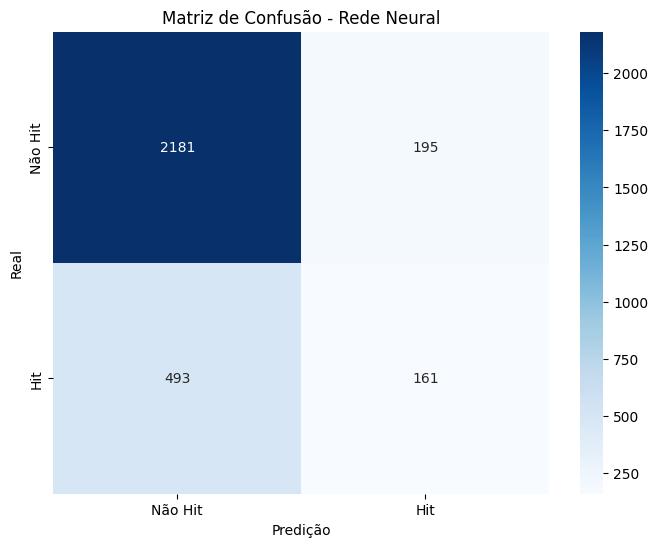

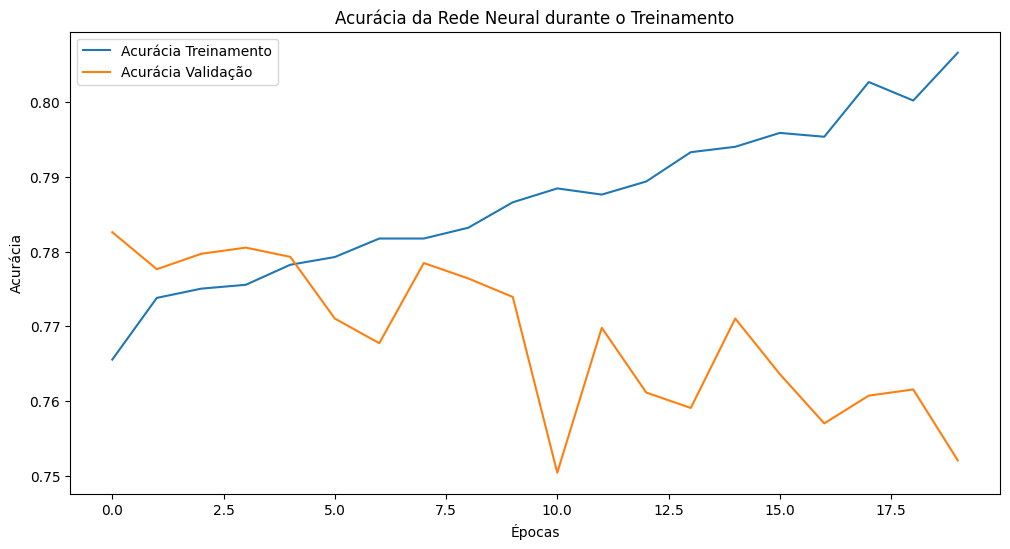

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


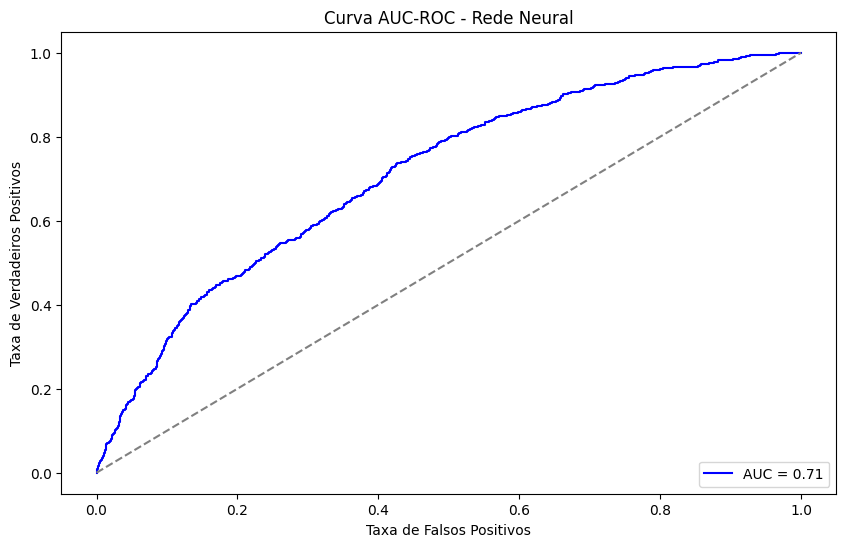

AUC-ROC da Rede Neural: 0.71


In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X = df[['Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness', 
        'Instrumentalness', 'Liveness', 'Valence', 'Tempo']].values
y = (df['Popularity'] > 60).astype(int)  # Considerando popularidade > 60 como hit (1), caso contrário não hit (0)

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Construir a Rede Neural
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # Primeira camada oculta
model.add(Dense(64, activation='relu'))  # Segunda camada oculta
model.add(Dense(32, activation='relu'))  # Terceira camada oculta
model.add(Dense(1, activation='sigmoid'))  # Camada de saída (classificação binária)

# Compilar o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinar a rede neural
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Avaliar o modelo no conjunto de teste
y_pred_nn = (model.predict(X_test) > 0.5).astype(int)

# Avaliar as métricas
accuracy_nn = accuracy_score(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

# Exibir as métricas
print(f"**Rede Neural Profunda**")
print(f'Acurácia: {accuracy_nn:.2f}')
print(f'MSE: {mse_nn:.2f}')
print(f'MAE: {mae_nn:.2f}')
print(f'R²: {r2_nn:.2f}')

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_nn))

# Matriz de Confusão
cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Hit', 'Hit'], yticklabels=['Não Hit', 'Hit'])
plt.title('Matriz de Confusão - Rede Neural')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.show()

# Visualizar o histórico de treinamento
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Acurácia Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.title('Acurácia da Rede Neural durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

# AUC-ROC
y_pred_prob_nn = model.predict(X_test)
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_prob_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Plotando a curva AUC-ROC para a Rede Neural
plt.figure(figsize=(10, 6))
plt.plot(fpr_nn, tpr_nn, color='blue', label=f'AUC = {roc_auc_nn:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Linha de identidade
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva AUC-ROC - Rede Neural')
plt.legend(loc='lower right')
plt.show()

# Exibir AUC-ROC
print(f'AUC-ROC da Rede Neural: {roc_auc_nn:.2f}')


---

# Pipeline de Monitoramento Contínuo para Predição de Hits Musicais

Esta pipeline foi criada para monitorar e avaliar modelos de predição sobre se uma música é ou não um "hit" com base em características musicais. O processo envolve:

1. **Carregamento de Dados:** Utilizamos um dataset com características de músicas como "Danceability", "Energy", "Loudness", "Tempo", e "Acousticness", além da popularidade da faixa.

2. **Pré-processamento:** Inclui imputação de dados faltantes e normalização para garantir que as variáveis estejam em uma escala compatível para os modelos.

3. **Treinamento de Modelos:** Diversos modelos de aprendizado supervisionado (como Random Forest, KNN, SVC, Logistic Regression e Decision Tree) e não supervisionado (K-means, GMM) são treinados para prever se a música será um hit ou não.

4. **Avaliação de Performance:** A acurácia de cada modelo é monitorada para garantir que o modelo continue com uma boa performance.

5. **Monitoramento Contínuo:** A performance do modelo é constantemente monitorada, e, caso a acurácia caia abaixo de um limite, o modelo pode ser re-treinado automaticamente para se ajustar a novos dados.

Essa pipeline permite garantir que a predição de hits musicais seja sempre precisa e eficiente, com monitoramento e ajustes contínuos conforme necessário.


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import numpy as np
import joblib  # Para salvar os modelos


In [24]:
df = pd.read_csv('/kaggle/input/basehit/ClassicHit.csv')

# Definindo X e y
X = df[['Danceability', 'Energy', 'Loudness', 'Tempo', 'Acousticness']]  
y = (df['Popularity'] > 70).astype(int)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# Pipeline para classificação
def create_pipeline(model):
    return Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),  # Imputação de dados faltantes
        ('scaler', StandardScaler()),  # Normalização dos dados
        ('classifier', model)  # Modelo de predição
    ])


In [27]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Definindo X e y
X = df[['Danceability', 'Energy', 'Loudness', 'Tempo', 'Acousticness']]  
y = (df['Popularity'] > 70).astype(int)

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Certificando-se de que X_test tem as mesmas colunas de X_train
X_test = X_test[X.columns]

# Dicionário com os modelos
models = {
    'RandomForest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression(),
    'DecisionTree': DecisionTreeClassifier(),
    'KMeans': KMeans(n_clusters=2),
    'GMM': GaussianMixture(n_components=2)
}

# Dicionário para armazenar os resultados
results = {}

# Função para criar a pipeline de pré-processamento + modelo
def create_pipeline(model):
    return Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),  # Preenche valores faltantes
        ('scaler', StandardScaler()),  # Normaliza os dados
        ('model', model)  # Modelo de aprendizado
    ])

# Loop para treinar e avaliar todos os modelos
for name, model in models.items():
    print(f'Treinando o modelo {name}...')
    
    # Criando a pipeline
    pipeline = create_pipeline(model)
    pipeline.fit(X_train, y_train)
    
    # Avaliação
    if name in ['KMeans', 'GMM']:  # Modelos não supervisionados
        y_pred = pipeline.predict(X_test)
        score = silhouette_score(X_test, y_pred)  # Usando Silhouette Score para modelos de clustering
        print(f'Silhouette Score do {name}: {score:.4f}')
    else:  # Modelos supervisionados
        y_pred = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Acurácia do {name}: {accuracy:.4f}')
        results[name] = accuracy
    
    # Salvando o modelo treinado
    joblib.dump(pipeline, f'{name}_model.pkl')

# Exibindo as acurácias dos modelos supervisionados
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
print(results_df)


Treinando o modelo RandomForest...
Acurácia do RandomForest: 0.9231
Treinando o modelo KNN...
Acurácia do KNN: 0.8891
Treinando o modelo SVC...
Acurácia do SVC: 0.9007
Treinando o modelo LogisticRegression...
Acurácia do LogisticRegression: 0.9007
Treinando o modelo DecisionTree...
Acurácia do DecisionTree: 0.8455
Treinando o modelo KMeans...
Silhouette Score do KMeans: 0.0746
Treinando o modelo GMM...
Silhouette Score do GMM: 0.0115
                    Accuracy
RandomForest        0.923102
KNN                 0.889109
SVC                 0.900660
LogisticRegression  0.900660
DecisionTree        0.845545


In [28]:
import joblib
from sklearn.metrics import accuracy_score, silhouette_score

def monitor_model_performance(model_name, X_test, y_test):
    try:
        # Carregar o modelo treinado
        pipeline = joblib.load(f'{model_name}_model.pkl') 
        
        # Verificar se o modelo é supervisionado ou não
        if model_name in ['KMeans', 'GMM']:  # Modelos não supervisionados
            # Fazer a predição (previsão de clusters)
            y_pred = pipeline.predict(X_test)
            
            # Calcular o Silhouette Score (para modelos de clustering)
            score = silhouette_score(X_test, y_pred)
            print(f'{model_name}: Silhouette Score = {score:.4f}')
            return score
        else:  # Modelos supervisionados
            # Fazer a predição (classificação)
            y_pred = pipeline.predict(X_test)
            
            # Calcular a acurácia
            accuracy = accuracy_score(y_test, y_pred)
            print(f'{model_name}: Acurácia = {accuracy:.4f}')
            return accuracy
            
    except FileNotFoundError:
        print(f"Modelo {model_name} não encontrado.")
        return None

# Exemplo de como verificar o desempenho de um modelo específico:
models_to_check = ['RandomForest', 'KNN', 'SVC', 'LogisticRegression', 'DecisionTree', 'KMeans', 'GMM']

for model_name in models_to_check:
    accuracy_or_score = monitor_model_performance(model_name, X_test, y_test)
    if accuracy_or_score is not None:
        # Isso já será impresso dentro da função monitor_model_performance
        pass


RandomForest: Acurácia = 0.9231
KNN: Acurácia = 0.8891
SVC: Acurácia = 0.9007
LogisticRegression: Acurácia = 0.9007
DecisionTree: Acurácia = 0.8455
KMeans: Silhouette Score = 0.0746
GMM: Silhouette Score = 0.0115


In [29]:
import joblib
from sklearn.metrics import accuracy_score, silhouette_score

def monitor_model_performance(model_name, X_test, y_test):
    try:
        # Carregar o modelo treinado
        pipeline = joblib.load(f'{model_name}_model.pkl') 
        
        # Verificar se o modelo é supervisionado ou não
        if model_name in ['KMeans', 'GMM']:  # Modelos não supervisionados
            # Fazer a predição (previsão de clusters)
            y_pred = pipeline.predict(X_test)
            
            # Calcular o Silhouette Score (para modelos de clustering)
            score = silhouette_score(X_test, y_pred)
            return score
        else:  # Modelos supervisionados
            # Fazer a predição (classificação)
            y_pred = pipeline.predict(X_test)
            
            # Calcular a acurácia
            accuracy = accuracy_score(y_test, y_pred)
            return accuracy
            
    except FileNotFoundError:
        print(f"Modelo {model_name} não encontrado.")
        return None

def retrain_and_compare(model_name, pipeline, X_train, y_train, X_test, y_test):
    # Acurácia antes do re-treinamento
    accuracy_original = monitor_model_performance(model_name, X_test, y_test)
    print(f'{model_name}: Acurácia original = {accuracy_original:.4f}')

    # Re-treinando o modelo com novos dados
    print(f'Retreinando o modelo {model_name}...')
    pipeline.fit(X_train, y_train)

    # Salvando novamente o modelo treinado
    joblib.dump(pipeline, f'{model_name}_model.pkl')

    # Acurácia após o re-treinamento
    accuracy_retrained = monitor_model_performance(model_name, X_test, y_test)
    print(f'{model_name}: Acurácia após re-treinamento = {accuracy_retrained:.4f}')

    # Retornando as acurácias para comparação
    return accuracy_original, accuracy_retrained

# Exemplo de como re-treinar e comparar para um modelo específico:
models_to_retrain = ['RandomForest', 'KNN', 'SVC', 'LogisticRegression', 'DecisionTree']

for model_name in models_to_retrain:
    # Carregar o modelo original salvo
    pipeline = joblib.load(f'{model_name}_model.pkl')
    
    # Re-treinar o modelo e comparar as acurácias
    accuracy_original, accuracy_retrained = retrain_and_compare(model_name, pipeline, X_train, y_train, X_test, y_test)
    
    # Exibindo a comparação das acurácias (antes e depois do re-treinamento)
    print(f'\nComparação de acurácia para {model_name}:')
    print(f'Acurácia Original: {accuracy_original:.4f}')
    print(f'Acurácia após Re-treinamento: {accuracy_retrained:.4f}\n')


RandomForest: Acurácia original = 0.9231
Retreinando o modelo RandomForest...
RandomForest: Acurácia após re-treinamento = 0.9218

Comparação de acurácia para RandomForest:
Acurácia Original: 0.9231
Acurácia após Re-treinamento: 0.9218

KNN: Acurácia original = 0.8891
Retreinando o modelo KNN...
KNN: Acurácia após re-treinamento = 0.8891

Comparação de acurácia para KNN:
Acurácia Original: 0.8891
Acurácia após Re-treinamento: 0.8891

SVC: Acurácia original = 0.9007
Retreinando o modelo SVC...
SVC: Acurácia após re-treinamento = 0.9007

Comparação de acurácia para SVC:
Acurácia Original: 0.9007
Acurácia após Re-treinamento: 0.9007

LogisticRegression: Acurácia original = 0.9007
Retreinando o modelo LogisticRegression...
LogisticRegression: Acurácia após re-treinamento = 0.9007

Comparação de acurácia para LogisticRegression:
Acurácia Original: 0.9007
Acurácia após Re-treinamento: 0.9007

DecisionTree: Acurácia original = 0.8455
Retreinando o modelo DecisionTree...
DecisionTree: Acurácia